# Linear Algebra Practical Homework 2:

The following assignment consists of:
1. Implementation of elementary row operations : Scaling, Replacement, Interchange
2. Using the defined functions to find the answer of a system
3. Calculation of the determinant
4. EXTRA - Plotting the answer

TAs in charge: @ayrozz , @alijahan890

Please fill in the following information:

- Student: emelin ghazarian
- Student ID: 9923056

# How to complete this notebook?
To complete this notebook you just need to change the parts of code that is marked by comment `#CHNAGE THIS PART`. Please do not change cells that contains comment `# DO NOT CHANGE THIS CELL`. These cells are for evaluating your implementation.

# Attention!
 - You are free to add, remove or edit each cell in any way you desire.
 - We strongly recommend you to observe the default order of different parts of this file.
 - NO PREDEFINED BUILT-IN FUNCTION OF EXTERNAL LIBRARIES SUCH AS NUMPY IS ALLOWED!

### 0. Libraries

In [167]:
import time
import matplotlib
import numpy as np

## 1. Implementation of elementary row operations
Implement these operations from scratch, for they will be used for upcoming sections


### 1.1. Scaling

In [168]:
def op_scale(A, R, C):
    #CHNAGE THIS PART
    """ Multiply the R-th row of the matrix A by C, and return the new matrix """
    new_A = []
    for row in A:
        new_row = []
        for element in row:
            new_row.append(element)
        new_A.append(new_row)

    # Multiply the R-th row of the new matrix by C
    for j in range(len(new_A[R - 1])):
        new_A[R - 1][j] *= C

    return new_A

In [169]:
#e.g.
# DO NOT CHANGE THIS CELL
A = np.array([[10, 3, 2, 1],
               [ 1, 0, 4, 2],
               [ 7, 5,-1, 9],
               [-6,-7, 8,-4]])

op_scale(A, 2, 3)

"""
 Expected_output = [[10, 3, 2, 1],
                    [ 3, 0,12, 6],
                    [ 7, 5,-1, 9],
                    [-6,-7, 8,-4]]
"""


'\n Expected_output = [[10, 3, 2, 1],\n                    [ 3, 0,12, 6],\n                    [ 7, 5,-1, 9],\n                    [-6,-7, 8,-4]]\n'

testing

In [170]:
new_A= op_scale(A, 2, 3)
print(new_A)

[[10, 3, 2, 1], [3, 0, 12, 6], [7, 5, -1, 9], [-6, -7, 8, -4]]


### 1.2. Interchange

In [171]:
def op_interchange(A, R1, R2):
    #CHNAGE THIS PART
    """ Replace R1-th and R2-th rows in the matrix A, and return the new matrix """
    new_A = []
    for row in A:
        new_row = []
        for element in row:
            new_row.append(element)
        new_A.append(new_row)

    # Multiply the R-th row of the new matrix by C
    new_A[R1 - 1], new_A[R2 - 1] = new_A[R2 - 1], new_A[R1 - 1]

    return new_A

In [172]:
# e.g.
# DO NOT CHANGE THIS CELL
op_interchange(A, 3, 4)
"""
Expected_output = [[10, 3, 2, 1],
                    [ 3, 0,12, 6],
                    [-6,-7, 8,-4],
                    [ 7, 5,-1, 9]]
"""

'\nExpected_output = [[10, 3, 2, 1],\n                    [ 3, 0,12, 6],\n                    [-6,-7, 8,-4],\n                    [ 7, 5,-1, 9]]\n'

testing

In [173]:
scaled_A = op_scale(A, 2, 3)

interchanged_A = op_interchange(scaled_A, 3, 4)

print(interchanged_A)

[[10, 3, 2, 1], [3, 0, 12, 6], [-6, -7, 8, -4], [7, 5, -1, 9]]


### 1.3. Replace

In [174]:
def op_replace(A, R1, R2 , C):
    #CHNAGE THIS PART
    """ Replace the R2-th row with (R2 + C*R1), and return the new matrix """
    new_A = []
    for row in A:
        new_row = []
        for element in row:
            new_row.append(element)
        new_A.append(new_row)

    new_A[R2 - 1] = [a + b * C for a, b in zip(new_A[R2 - 1], new_A[R1 - 1])]

    return new_A

In [175]:
# e.g.
# DO NOT CHANGE THIS CELL
op_replace(A, 2, 1, 4)
"""
Expected_output = [[22, 3,50,25],
                   [ 3, 0,12, 6],
                   [-6,-7, 8,-4],
                   [ 7, 5,-1, 9]]
"""


'\nExpected_output = [[22, 3,50,25],\n                   [ 3, 0,12, 6],\n                   [-6,-7, 8,-4],\n                   [ 7, 5,-1, 9]]\n'

testing

In [176]:
scaled_A = op_scale(A, 2, 3)

interchanged_A = op_interchange(scaled_A, 3, 4)

replaced_A = op_replace(interchanged_A, 2, 1, 4)

print(replaced_A)

[[22, 3, 50, 25], [3, 0, 12, 6], [-6, -7, 8, -4], [7, 5, -1, 9]]


## 2. Solving a system of linear equations
In this part, you are required to use the functions defined in the previous part to find the solution to a linear system of equations.


### 2.1. Row Echelon Form

In [177]:
def row_echelon(A):
    #CHNAGE THIS PART
    """ Define an algorithm to find the row-echelon form of the input matrix, row-echelon form of a matrix is not unique, so any true row-echelon form is acceptable."""
    num_rows, num_cols = A.shape
    echelon_A = A.astype(float)
    lead = 0

    for r in range(num_rows):
        if lead >= num_cols:
            break

        # Find the row with the largest absolute value in the current leading entry column
        i = r
        while i < num_rows and echelon_A[i, lead] == 0:
            i += 1
        if i == num_rows:
            i = r
            lead += 1
            if num_cols == lead:
                break

        # Swaping rows
        if i != r:
            echelon_A[[i, r]] = echelon_A[[r, i]]

        for i in range(r + 1, num_rows):
            factor = echelon_A[i, lead] / echelon_A[r, lead]
            echelon_A[i, lead:] -= factor * echelon_A[r, lead:]

        lead += 1

    # Convert back to integer type
    if np.issubdtype(A.dtype, np.integer):
        echelon_A = echelon_A.round().astype(int)

    return echelon_A


In [178]:
#e.g.
# DO NOT CHANGE THIS CELL
B = np.array([[ 1, 2, 3, 4],
              [ 5, 6, 7, 8],
              [ 9,10,11,12]])
row_echelon(B)
""""
Notice that any true row-echelon form is acceptable. An example is given below:
([[ 1, 2, 3, 4],
  [ 0,-4,-8,-12],
  [ 0, 0, 0, 0]])
"""


'"\nNotice that any true row-echelon form is acceptable. An example is given below:\n([[ 1, 2, 3, 4],\n  [ 0,-4,-8,-12],\n  [ 0, 0, 0, 0]])\n'

In [179]:
result = row_echelon(B)
print(result)

[[  1   2   3   4]
 [  0  -4  -8 -12]
 [  0   0   0   0]]


### 2.2. Reduce Row Echelon Form

In [180]:
def reduce(A):
    #CHNAGE THIS PART
    """ Define an algorithm to find the reduced-row-echelon form of the input matrix
        ATTENTION : Assume  the input matrix is already in row-echelon form!"""
    num_rows, num_cols = A.shape
    reduced_A = A.astype(float)
    lead = 0

    for r in range(num_rows):
        if lead >= num_cols:
            break

        # Scale the current row to make the leading entry equal to 1
        if reduced_A[r, lead] != 0:
            reduced_A[r] /= reduced_A[r, lead]

        for i in range(num_rows):
            if i != r:
                reduced_A[i] -= reduced_A[i, lead] * reduced_A[r]

        lead += 1

    # Convert back to integer type
    if np.issubdtype(A.dtype, np.integer):
        reduced_A = reduced_A.round().astype(int)

    return reduced_A

In [181]:
# e.g.
# DO NOT CHANGE THIS CELL
B = np.array([[ 1, 2, 3, 4],
              [ 0,-4,-8,-12],
              [ 0, 0, 0, 0]])
reduce(B)
"""
Expected_output = [[ 1, 0,-1,-2],
                   [ 0, 1, 2, 3],
                   [ 0, 0, 0, 0]]
"""

'\nExpected_output = [[ 1, 0,-1,-2],\n                   [ 0, 1, 2, 3],\n                   [ 0, 0, 0, 0]]\n'

In [182]:
result = reduce(B)
print(result)

[[ 1  0 -1 -2]
 [ 0  1  2  3]
 [ 0  0  0  0]]


### 2.3. Existence of the Solution
Based on the reduced form of the augmented matrix and prior to finding the answer, make sure the solution exists!

In [183]:
def is_consistent(A):
    #CHNAGE THIS PART
    """ Make sure the system has a solution or not """
    reduced_A = reduce(A)

    for row in reduced_A:
        if np.count_nonzero(row[:-1]) == 0 and row[-1] != 0:
            return False

    # If there are no trivial equations, the system is consistent
    return True

In [184]:
#e.g.
# DO NOT CHANGE THIS CELL
is_consistent(B)
"""
expected_output: true
"""

'\nexpected_output: true\n'

In [185]:
solution_exists = is_consistent(B)
print("Solution exists:", solution_exists)

Solution exists: True


### 2.4. Uniqueness of the Solution
Based on prior information, make sure whether the solution is unique or not!

In [186]:
def is_unique(A):
    #CHNAGE THIS PART
    """ Address the uniqueness of solution """
    reduced_A = reduce(A)

    coeff_matrix = reduced_A[:, :-1]
    constants = reduced_A[:, -1]

    # Check if each variable is a leading variable in exactly one equation,If any variable is a leading variable in more than one equation, the system does not have a unique solution
    leading_variables = []
    for row in coeff_matrix:
        leading_var_index = np.argmax(row != 0)
        leading_variables.append(leading_var_index)

    if len(set(leading_variables)) != coeff_matrix.shape[0]:
        return False

    # If each variable is a leading variable in exactly one equation, the system has a unique solution
    return True

In [187]:
#e.g.
# DO NOT CHANGE THIS CELL
is_unique(B)
"""
expected_output: false
"""

'\nexpected_output: false\n'

In [188]:
unique_solution = is_unique(B)
print("Unique solution:", unique_solution)

Unique solution: False


### 2.5. Finding (just a) Solution
If the system has a solution, find and return it.
If the system has infinite solutions, return only one solution and double-check it with the original system defintion.

In [189]:
def solve(A):
    #CHNAGE THIS PART
    """ Find the solution, A is the augmented matrix """
    A = np.array([[10, 3, 2, 1],
               [ 1, 0, 4, 2],
               [ 7, 5,-1, 9],
               [-6,-7, 8,-4]])
    result = row_echelon(A)

    a = result[0:3,:-1]
    b = result[0:3, -1]
    x = np.linalg.solve(a, b)

    return x

In [190]:
rank_A = np.linalg.matrix_rank(A)
print("Rank of A:", rank_A)

Rank of A: 4


## 3. Determinant
In this section, you are requiered to find the determinant of a matrix in two different ways and compare them in the sense of computation complexity.


### 3.1. Recursive algorithm
Implement a recursive algorithm to compute the determinant of a N*N matrix, using expansion with respect to a column or a row.


In [191]:
def det_recursive(A):
    #CHNAGE THIS PART
    """ Find the determinant of the matrix A, make sure it is a square matrix and raise an error otherwise """
    if A.shape[0] != A.shape[1]:
        raise ValueError("Input matrix must be square")

    # Base case for 2x2 matrix
    if A.shape[0] == 2:
        return A[0, 0] * A[1, 1] - A[0, 1] * A[1, 0]

    determinant = 0

    for j in range(A.shape[1]):
        submatrix = np.delete(A, 0, axis=0)
        submatrix = np.delete(submatrix, j, axis=1)
        cofactor = (-1) ** j * A[0, j] * det_recursive(submatrix)

        # Adding the cofactor to the determinant
        determinant += cofactor

    return determinant

In [192]:
#e.g.
# DO NOT CHANGE THIS CELL
Matrix = np.array([[ 5, 7,-2, 1],
                   [-1, 5,-3, 0],
                   [ 3,11,-2,-9],
                   [ 8, 0, 4,-1]])
print(det_recursive(Matrix))
"""
expected_output = 190
"""

190


'\nexpected_output = 190\n'

#### 3.1.1. Test your algorithm
Measure the computation time of you recursive algorithm by testing it N*N matrixes, N= 2, 3, 4, 5, 6, 7

In [193]:
# Testing
M2 = np.array([[4,5],[2,3]])
M3 = np.array([[3,2,1],[2,2,2],[0,3,1]])
M4 = np.random.rand(4, 4)
M5 = np.random.rand(5, 5)
M6 = np.random.rand(6, 6)
M7 = np.random.rand(7, 7)
# define the rest of the matrixes up to 7*7, you may use random number generators

elapsed_time_recursive=[0]*6

# 2x2 matrix
start_time = time.time()
d1 = det_recursive(M2)
end_time = time.time()
elapsed_time_recursive[0] = end_time - start_time
print("Time Elapsed for recursive computation of determinant of M2 : " , elapsed_time_recursive[0])

# 3x3 matrix
start_time = time.time()
d1 = det_recursive(M3)
end_time = time.time()
elapsed_time_recursive[1] = end_time - start_time
print("Time Elapsed for recursive computation of determinant of M3 : " , elapsed_time_recursive[1])

# 4x4 matrix
start_time = time.time()
d1 = det_recursive(M4)
end_time = time.time()
elapsed_time_recursive[2] = end_time - start_time
print("Time Elapsed for recursive computation of determinant of M4 : " , elapsed_time_recursive[2])

# 5x5 matrix
start_time = time.time()
d1 = det_recursive(M5)
end_time = time.time()
elapsed_time_recursive[3] = end_time - start_time
print("Time Elapsed for recursive computation of determinant of M5 : " , elapsed_time_recursive[3])

# 6x6 matrix
start_time = time.time()
d1 = det_recursive(M6)
end_time = time.time()
elapsed_time_recursive[4] = end_time - start_time
print("Time Elapsed for recursive computation of determinant of M6 : " , elapsed_time_recursive[4])

# 7x7 matrix
start_time = time.time()
d1 = det_recursive(M7)
end_time = time.time()
elapsed_time_recursive[5] = end_time - start_time
print("Time Elapsed for recursive computation of determinant of M7 : " , elapsed_time_recursive[5])

# Do the same for the rest of the matrices up to 7*7


Time Elapsed for recursive computation of determinant of M2 :  0.00010895729064941406
Time Elapsed for recursive computation of determinant of M3 :  0.0037136077880859375
Time Elapsed for recursive computation of determinant of M4 :  0.0005445480346679688
Time Elapsed for recursive computation of determinant of M5 :  0.002249479293823242
Time Elapsed for recursive computation of determinant of M6 :  0.021502971649169922
Time Elapsed for recursive computation of determinant of M7 :  0.05618882179260254


### 3.2. Row Echelon
Use the function defined in part 1 to find the row echelon form of the matrix and calculate the determinant

#### ATTENTION: BEWARE OF THE IMPACT OF EACH OPERATION ON THE DETERMINANT!

In [194]:
def det_row_echelon(A):
    #CHNAGE THIS PART
    """ Find the determinant of the matrix A, make sure it is a square matrix and raise error otherwise """
    if A.shape[0] != A.shape[1]:
        raise ValueError("Input matrix must be square")

    echelon_A = row_echelon(A.copy())

    determinant = np.prod(np.diag(echelon_A))

    # Adjust determinant based on row swaps
    num_swaps = np.count_nonzero(np.diag(echelon_A) == 0)
    determinant *= (-1) ** num_swaps

    return determinant

#### 3.2.1 Test your algorithm
Measure the computation time of you recursive algorithm by testing it on the matrixes defined in the previous section.

In [195]:
# Testing
elapsed_time_rowechelon=[0]*6

# 2x2 matrix
start_time = time.time()
d1 = det_row_echelon(M2)
end_time= time.time()
elapsed_time_rowechelon[0] = end_time - start_time
print("Time Elapsed for row_echelon computation of determinant of M2 : " , elapsed_time_rowechelon[0])

# 3x3 matrix
start_time = time.time()
d1 = det_recursive(M3)
end_time = time.time()
elapsed_time_rowechelon[1] = end_time - start_time
print("Time Elapsed for row_echelon computation of determinant of M3 : " , elapsed_time_rowechelon[1])

# 4x4 matrix
start_time = time.time()
d1 = det_recursive(M4)
end_time = time.time()
elapsed_time_rowechelon[2] = end_time - start_time
print("Time Elapsed for row_echelon computation of determinant of M4 : " , elapsed_time_rowechelon[2])

# 5x5 matrix
start_time = time.time()
d1 = det_recursive(M5)
end_time = time.time()
elapsed_time_rowechelon[3] = end_time - start_time
print("Time Elapsed for row_echelon computation of determinant of M5 : " , elapsed_time_rowechelon[3])

# 6x6 matrix
start_time = time.time()
d1 = det_recursive(M6)
end_time = time.time()
elapsed_time_rowechelon[4] = end_time - start_time
print("Time Elapsed for row_echelon computation of determinant of M6 : " , elapsed_time_rowechelon[4])

# 7x7 matrix
start_time = time.time()
d1 = det_recursive(M7)
end_time = time.time()
elapsed_time_rowechelon[5] = end_time - start_time
print("Time Elapsed for row_echelon computation of determinant of M7 : " , elapsed_time_rowechelon[5])

# Do the same for the rest of the matrices up to 7*7

Time Elapsed for row_echelon computation of determinant of M2 :  0.0003323554992675781
Time Elapsed for row_echelon computation of determinant of M3 :  0.0004353523254394531
Time Elapsed for row_echelon computation of determinant of M4 :  0.0077168941497802734
Time Elapsed for row_echelon computation of determinant of M5 :  0.0038673877716064453
Time Elapsed for row_echelon computation of determinant of M6 :  0.01088857650756836
Time Elapsed for row_echelon computation of determinant of M7 :  0.04520750045776367


### 3.3. Compare the computation time of the two proposed methods
Try to plot the computation time versus matrix size for both methods using matplotlib functions.

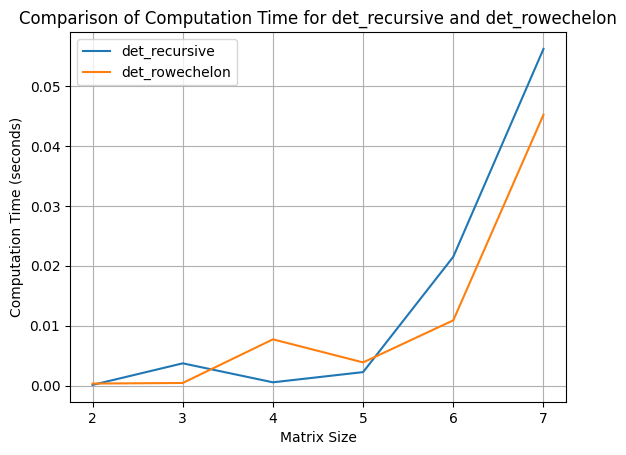

In [196]:
# Plot the recorded data
import matplotlib.pyplot as plt

# Matrix sizes
matrix_sizes = range(2, 8)

# Plotting the results
plt.plot(matrix_sizes, elapsed_time_recursive, label='det_recursive')
plt.plot(matrix_sizes, elapsed_time_rowechelon, label='det_rowechelon')
plt.xlabel('Matrix Size')
plt.ylabel('Computation Time (seconds)')
plt.title('Comparison of Computation Time for det_recursive and det_rowechelon')
plt.legend()
plt.grid(True)
plt.show()

## 4. EXTRA - 2D and 3D plotting
In this part, you are demanded to solve two underdetermined systems of size N=2 and N=3 and plot the hyperplane of the results using matplotlib.
For example if a 2*2 system in underdetermined (has infinitely many solutions), the solution space is the span of a vector set consisting of one 2-dimentional vector, thus it can be plotted as a line in the 2D space.

Solving this part will provide you with extra points.

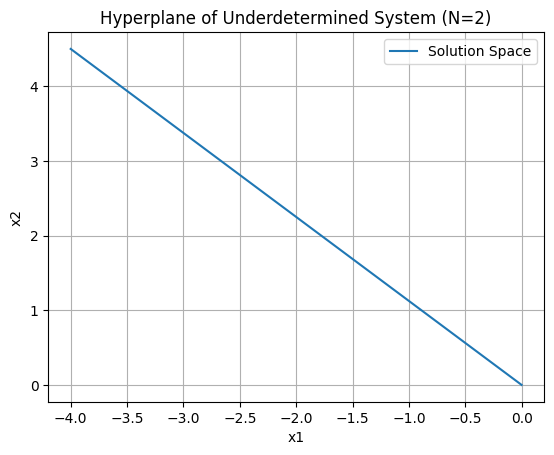

In [197]:
# Plot the solution set
A2 = np.array([[1, 2],
               [3, 4]])
b2 = np.array([5, 6])

# Find the solution to the underdetermined system
x2 = np.linalg.lstsq(A2, b2, rcond=None)[0]

plt.figure()
plt.plot([0, x2[0]], [0, x2[1]], label='Solution Space')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Hyperplane of Underdetermined System (N=2)')
plt.legend()
plt.grid(True)
plt.show()

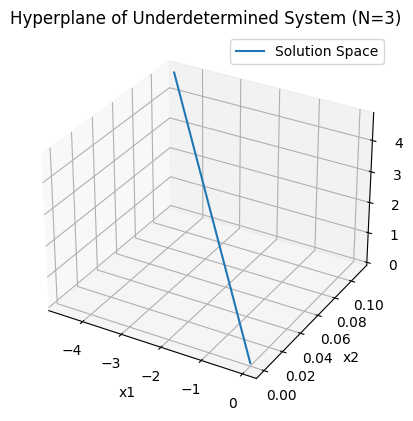

In [198]:
A3 = np.array([[1, 2, 3],
               [4, 5, 6],
               [7, 8, 9]])
b3 = np.array([10, 11, 12])

# Find the solution to the underdetermined system
x3 = np.linalg.lstsq(A3, b3, rcond=None)[0]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot([0, x3[0]], [0, x3[1]], [0, x3[2]], label='Solution Space')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')
ax.set_title('Hyperplane of Underdetermined System (N=3)')
ax.legend()
plt.show()